# Importação das Bibliotecas

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from composicao_estatisticas import composicao_histograma_boxplot
from composicao_estatisticas import calcular_estatisticas
from composicao_estatisticas import teste_f_variancias

# Leitura e Anális da Base

In [2]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincronização\Documentos\GitHub\hypothesis_test_human_development_index\dados\idhm_educacao_teste_hipoteses.xlsx"
df = pd.read_excel(DADOS)

# Visualizar as primeiras linhas da tabela
df.head()

,IDHM_Educacao Nordeste,IDHM_Educacao Sul,IDHM_Educacao Norte
0,0.698,0.702,0.658
1,0.679,0.768,0.673
2,0.695,0.712,0.749
3,0.668,0.800,0.638
4,0.694,0.768,0.658


In [3]:
# Visualizar as últimas linhas da tabela
df.tail()

,IDHM_Educacao Nordeste,IDHM_Educacao Sul,IDHM_Educacao Norte
1789,0.391,NaN,NaN
1790,0.390,NaN,NaN
1791,0.488,NaN,NaN
1792,0.502,NaN,NaN
1793,0.459,NaN,NaN


In [4]:
# Conferir os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDHM_Educacao Nordeste  1794 non-null   float64
 1   IDHM_Educacao Sul       1189 non-null   float64
 2   IDHM_Educacao Norte     449 non-null    float64
dtypes: float64(3)
memory usage: 42.2 KB


# Identificação do Problema

A Secretaria da Educação solicitou a análise do IDHM Educação por região para avaliar se a diferença no índice, observada entre as regiões, é estatisticamente significante. Para isso, consolidou a base de dados das 3 principais regiões a serem avaliadas: Norte, Nordeste e Sul com uma amostra de seus municípios.

Este trablho consiste em 3 tarefas principais:
- Construir histogramas para cada região e avaliar se as distribuições se aproximam da Normal
- Calcular as medidas resumo por região: número de observações, média e desvio padrão
- Realizar um Teste de Hipóteses para comparar se a média do IDHM Educação é diferente entre as regiões: Nordeste e Sul e Norte e Nordeste

Para cada Teste de Hipóteses, serão realizados os seguintes passos:

- Formular as hipóteses a serem testadas
- Avaliar se as variâncias do IDHM entre as regiões podem ser consideradas iguais para selecionar o teste mais adequado
- Calcular o p-valor
- Interpretar o resultado do teste considerando um coeficiente de confiança de 5%

## Histogramas por Região

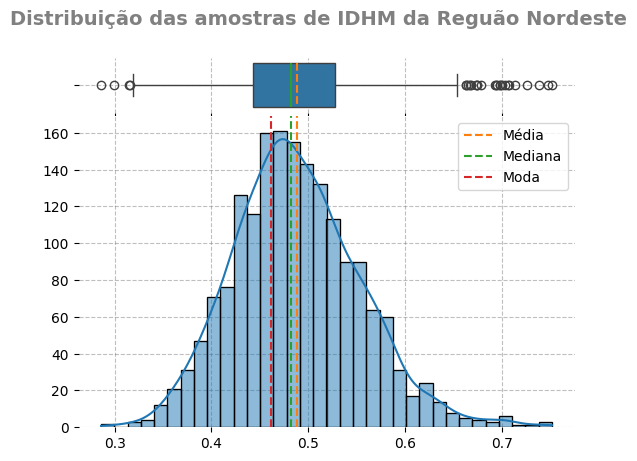

In [5]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Nordeste', titulo="Distribuição das amostras de IDHM da Reguão Nordeste")

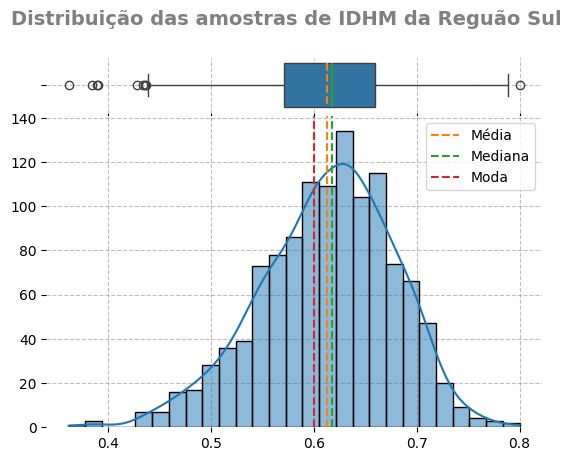

In [6]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Sul', titulo="Distribuição das amostras de IDHM da Reguão Sul")

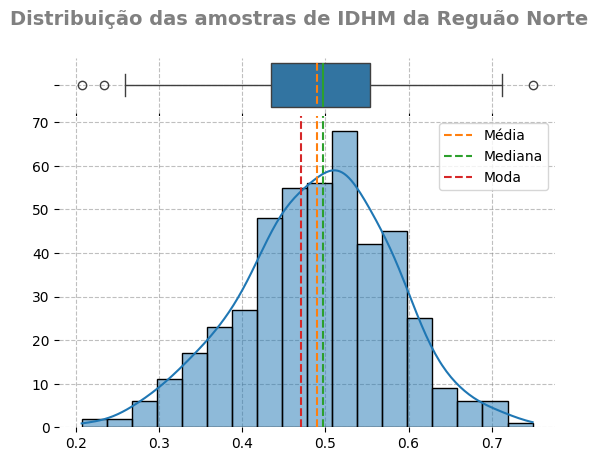

In [7]:
composicao_histograma_boxplot(df, 'IDHM_Educacao Norte', titulo="Distribuição das amostras de IDHM da Reguão Norte")

## Medidas Resumo por Região

In [8]:
numero_observacoes = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].count()
media = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].mean().round(2)
desvio_padrao = df[['IDHM_Educacao Nordeste', 'IDHM_Educacao Sul', 'IDHM_Educacao Norte']].std().round(3)

print("Número de Observações")
print(numero_observacoes)
print("------------")
print("Comparação das médias amostrais")
print(media)
print("------------")
print("Comparação dos desvios amostrais")
print(desvio_padrao)

Número de Observações
IDHM_Educacao Nordeste    1794
IDHM_Educacao Sul         1189
IDHM_Educacao Norte        449
dtype: int64
------------
Comparação das médias amostrais
IDHM_Educacao Nordeste    0.49
IDHM_Educacao Sul         0.61
IDHM_Educacao Norte       0.49
dtype: float64
------------
Comparação dos desvios amostrais
IDHM_Educacao Nordeste    0.066
IDHM_Educacao Sul         0.065
IDHM_Educacao Norte       0.091
dtype: float64


## Testes de Hipóteses

Vamos relembrar os passos definidos para os Testes de Hipóteses:

1. Formular as hipóteses a serem testadas
2. Avaliar se as variâncias do IDHM entre as regiões podem ser consideradas iguais para selecionar o teste mais adequado
3. Calcular o p-valor
4. Interpretar o resultado do teste considerando um coeficiente de confiança de 5%

### 1. Formulação das Hipóteses

**Nordeste x Sul**
- H0: A média do IDHM Educação do Nordeste é igual à média IDHM do Sul, ou: IDHMn = IDHMs
- H1: A média do IDHM Educação do Nordeste é menor do que a média IDHM do Sul, ou: IDHMn < IDHMs

**Nordeste x Sul**
- H0: A média do IDHM Educação do Nordeste é igual à média IDHM do Norte, ou: IDHMnordeste = IDHMnorte
- H1: A média do IDHM Educação do Nordeste é diferente da média IDHM do Norte, ou: IDHMnordeste < IDHMnorte

### 2. Teste de Hipóteses das Variâncias

In [9]:
# Considerando que as colunas são as amostras de cada região
amostra_idhm_nordeste = df['IDHM_Educacao Nordeste']
amostra_idhm_norte = df['IDHM_Educacao Norte']
amostra_idhm_sul = df['IDHM_Educacao Sul']

In [10]:
variancia_nordeste = amostra_idhm_nordeste.var(ddof=1).round(4)
variancia_norte = amostra_idhm_norte.var(ddof=1).round(4)
variancia_sul = amostra_idhm_sul.var(ddof=1).round(4)

print("Variância Amostral por Região:")
print(f"Nordeste: {variancia_nordeste}")
print(f"Norte: {variancia_norte}")
print(f"Sul: {variancia_sul}")

Variância Amostral por Região:
Nordeste: 0.0043
Norte: 0.0082
Sul: 0.0042


#### Comparação das Variâncias do Sul e Nordeste

In [19]:
# Executando os testes e armazenando os p-valores
p_nordeste_sul = teste_f_variancias(amostra_idhm_nordeste, amostra_idhm_sul, nome1="Nordeste", nome2="Sul")

# Nordeste vs Sul
print("\n📌 Teste F para variâncias do Nordeste e Sul")
print("=" * 60)
print(" 🔹 Regra: p-valor > 5% → Não rejeitamos H0")
print(f" 🔹 Resultado: p-valor = {p_nordeste_sul * 100:.2f}%")
print("Como o p-valor de 69,63% é maior que 5%, não há evidências para rejeitar que as variâncias são iguais.")

 TESTE F PARA IGUALDADE DE VARIÂNCIAS (Nordeste vs. Sul) 

    H0: As variâncias de Nordeste e Sul são iguais.
    H1: As variâncias de Nordeste e Sul são diferentes.
    
 RESULTADOS DO TESTE F 
Variância de Nordeste     : 0.00433
Variância de Sul     : 0.00425
Estatística F            : 1.01861
Graus de liberdade       : 1793, 1188
--------------------------------------------------
p-valor (bicaudal)       : 73.03%
--------------------------------------------------
Decisão: Não rejeitamos H0 → As variâncias são estatisticamente iguais.

📌 Teste F para variâncias do Nordeste e Sul
 🔹 Regra: p-valor > 5% → Não rejeitamos H0
 🔹 Resultado: p-valor = 73.03%
Como o p-valor de 69,63% é maior que 5%, não há evidências para rejeitar que as variâncias são iguais.


#### Comparação das Variâncias do Norte e Nordeste

In [18]:
p_norte_nordeste = teste_f_variancias(amostra_idhm_norte, amostra_idhm_nordeste, nome1="Norte", nome2="Nordeste")

# Norte vs Nordeste
print("\n📌 Teste F para variâncias do Norte e Nordeste")
print("=" * 60)
print(" 🔹 Regra: p-valor < 5% → Rejeitamos H0")
print(f" 🔹 Resultado: p-valor = {p_norte_nordeste * 100:.2f}%")
print("Há evidências para rejeitar que as variâncias são iguais, então consideraremos as variâncias diferentes.")
print("=" * 60)

 TESTE F PARA IGUALDADE DE VARIÂNCIAS (Norte vs. Nordeste) 

    H0: As variâncias de Norte e Nordeste são iguais.
    H1: As variâncias de Norte e Nordeste são diferentes.
    
 RESULTADOS DO TESTE F 
Variância de Norte     : 0.00822
Variância de Nordeste     : 0.00433
Estatística F            : 1.89941
Graus de liberdade       : 1793, 1793
--------------------------------------------------
p-valor (bicaudal)       : 0.00%
--------------------------------------------------
Decisão: Rejeitamos H0 → As variâncias são significativamente diferentes.

📌 Teste F para variâncias do Norte e Nordeste
 🔹 Regra: p-valor < 5% → Rejeitamos H0
 🔹 Resultado: p-valor = 0.00%
Há evidências para rejeitar que as variâncias são iguais, então consideraremos as variâncias diferentes.


### 3. Teste de Hipóteses para Duas Populações

#### Nordeste x Sul

In [26]:
# Teste de Hipóteses: média de duas populações
print("="*40)
print(" TESTE F PARA IGUALDADE DE VARIÂNCIAS ")
print("="*40)
print("""
Como o p-valor é menor que 5%, rejeitamos H0.
Então existem evidências estatísticas que o IDHM do Nordeste é menor que o do Sul.

Relembrando as hipóteses definidas:
H0: A média do IDHM Educação do Nordeste é igual à média IDHM do Sul, ou: IDHMnordeste = IDHMsul
H1: A média do IDHM Educação do Nordeste é menor do que a média IDHM do Sul, ou: IDHMnordeste < IDHMsul
""")
print("="*40)

# Reutilizando as colunas com as amostras das regiões Nordeste e Sul
amostra_idhm_nordeste = df['IDHM_Educacao Nordeste'].dropna()
amostra_idhm_sul = df['IDHM_Educacao Sul'].dropna()

# Cálculo das variâncias amostrais
variancia_nordeste = amostra_idhm_nordeste.var(ddof=1).round(4)
variancia_sul = amostra_idhm_sul.var(ddof=1).round(4)

# Verificação das variâncias para definir o tipo de teste t
if variancia_sul / variancia_nordeste < 1.5 and variancia_nordeste / variancia_sul < 1.5:  # Critério empírico
    equal_var = True
else:
    equal_var = False
    
# Teste t de Student (para comparar médias)
t_stat, p_val = stats.ttest_ind(amostra_idhm_sul, amostra_idhm_nordeste, equal_var=equal_var)

# Exibição dos resultados
print("=" * 50)
print(" TESTE T PARA MÉDIAS (HIPÓTESE UNICAUDAL DIREITA) ")
print("=" * 50)
print(f"Estatística t               : {t_stat:.5f}")
print(f"Variância do Nordeste       : {variancia_nordeste:.5f}")
print(f"Variância do Sul            : {variancia_sul:.5f}")

print("-" * 50)
print(f"p-valor (unicaudal, H1: Sul > Nordeste) : {p_val / 2:.5f}") # Divide por 2 para teste unicaudal
print("-" * 50)

# Definição do nível de significância
alpha = 0.05

# Teste Unicaudal à Direita (H1: amostra1 > amostra2)
if t_stat > 0 and (p_val / 2) < alpha:
    print("Rejeitamos H0 → A média do Sul é significativamente maior que a do Nordeste.")
else:
    print("Não rejeitamos H0 → Não há evidência suficiente para afirmar que a média do Sul seja maior.")

print("=" * 50)

 TESTE F PARA IGUALDADE DE VARIÂNCIAS 

Como o p-valor é menor que 5%, rejeitamos H0.
Então existem evidências estatísticas que o IDHM do Nordeste é menor que o do Sul.

Relembrando as hipóteses definidas:
H0: A média do IDHM Educação do Nordeste é igual à média IDHM do Sul, ou: IDHMnordeste = IDHMsul
H1: A média do IDHM Educação do Nordeste é menor do que a média IDHM do Sul, ou: IDHMnordeste < IDHMsul

 TESTE T PARA MÉDIAS (HIPÓTESE UNICAUDAL DIREITA) 
Estatística t               : 50.82222
Variância do Nordeste       : 0.00430
Variância do Sul            : 0.00420
--------------------------------------------------
p-valor (unicaudal, H1: Sul > Nordeste) : 0.00000
--------------------------------------------------
Rejeitamos H0 → A média do Sul é significativamente maior que a do Nordeste.


#### Norte x Nordeste